### Monte Carlo Simulations

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sympy as smp

#### Introduction

The purpose of Monte Carlo is to simulate a real life experiment that depends on randomness to some extent. 

* Counting number of radioactive decays from some radioactive source in a time interval Δt. The random variable here is the number of counts N (positive integer) and follows a **Poisson** probability mass function.

                                          f(x) = exp(-λ).pow(λ, x) / x!

* Determining the energy of the detected particles in a detector cell in the ATLAS calorimeter in a time interval Δt. The random variable here is the energy E (positive real number) and the corresponding probability density function is

                                          f(x) = F1.exp(-(sqrt(x/E1))) + F2.exp(-(sqrt(x/E2)))

* Determining the distance a particle travels through matter before it completely decays. The random variable here is the distance X and a really simple probability density function model might be

                                          f(x) = x0/exp(x,2)

* **Estimating a value for π (pie)**

For most cases this boils down into two steps

1. **Generate Random Variables According to a Distribution**
2. **Use these Random Variables to conduct some experiment**

#### 1. Generate Random Variables According to a Distribution

1.1 Inverting the CDF Analytically 

**Theorem:** If a random variable X has a CDF of F(x) then the variable F'(U), where U is a random uniform variable between 0 and 1, also has CDF F(x)
                                            X ~ F(x) ==> F'(U) ~ F(x)

**Example:** The exponential distribution is 
                                            f(x) = λ.exp(-λx) ==> F(x) = 1 - exp(-λx)

In [2]:
x = np.linspace(0,3,100)
f = 2*np.exp(-2*x)
F = 1-np.exp(-2*x)

#### Plot

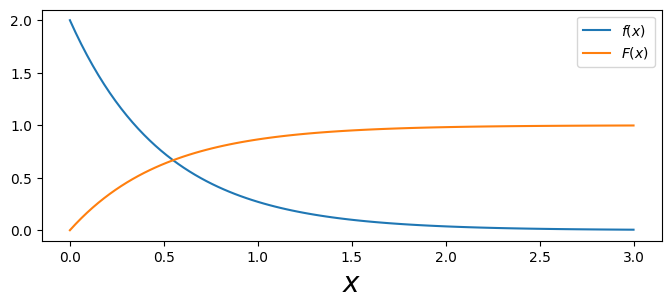

In [3]:
plt.figure(figsize=(8,3))
plt.plot(x, f, label=r'$f(x)$')
plt.plot(x, F, label=r'$F(x)$')
plt.legend()
plt.xlabel('$x$', fontsize=20)
plt.show()

Using F[F'(x)] = x, we get

                                            1 - exp(-λF'(x)) = x ==> F'(x) = -ln(1 - x)/λ

so if we evaluate a bunch of random uniform variables U and evaluate F'(U), they should be distributed according to f(x) above

In [4]:
Us = np.random.rand(10000)
F_inv_Us = -np.log(1-Us)/2

Lets plot these and see if they really are distributed according to f(x)

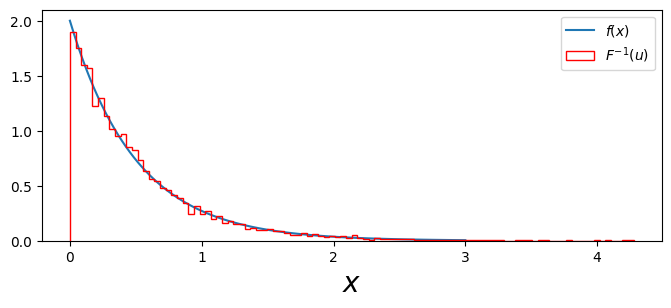

In [5]:
plt.figure(figsize=(8,3))
plt.plot(x, f, label=r'$f(x)$')
plt.hist(F_inv_Us, histtype='step', color='red', density='norm', bins=100, label='$F^{-1}(u)$')
plt.legend()
plt.xlabel('$x$', fontsize=20)
plt.show()

#### 1.2 Using a Search Sort Algorithm

Sometimes F(x) isn't invertible analytically, BUT
    * F(x) is always increasing with x
    
So it is necessarily invertible (there just might not be a formula for it)

                                                f(x) = F1.exp(-sqrt(x/E1)) + F2.exp(-sqrt(x/E2))

In [6]:
x, y, F1, F2, E1, E2 = smp.symbols('x y F_1 F_2 E_1 E_2', real=True, positive=True)
fs = F1*smp.exp(-smp.sqrt(x/E1)) + F2*smp.exp(-smp.sqrt(x/E2))
fs

F_1*exp(-sqrt(x)/sqrt(E_1)) + F_2*exp(-sqrt(x)/sqrt(E_2))

In [7]:
Fs = smp.integrate(fs, (x,0,y)).doit()
Fs

2*E_1*F_1 + 2*E_2*F_2 + F_1*(-2*sqrt(E_1)*sqrt(y)*exp(-sqrt(y)/sqrt(E_1)) - 2*E_1*exp(-sqrt(y)/sqrt(E_1))) + F_2*(-2*sqrt(E_2)*sqrt(y)*exp(-sqrt(y)/sqrt(E_2)) - 2*E_2*exp(-sqrt(y)/sqrt(E_2)))

In [8]:
Fn = smp.lambdify((y, E1, E2, F1, F2), Fs)
fn = smp.lambdify((x, E1, E2, F1, F2), fs)

Get parameters and actual numerical values

In [9]:
E1 = E2 = 0.2
F1 = 1.3
F2 = 1.4
x = np.linspace(0,5,1000)
f = fn(x, E1, E2, F1, F2)
F = Fn(x, E1, E2, F1, F2)

#### Plot

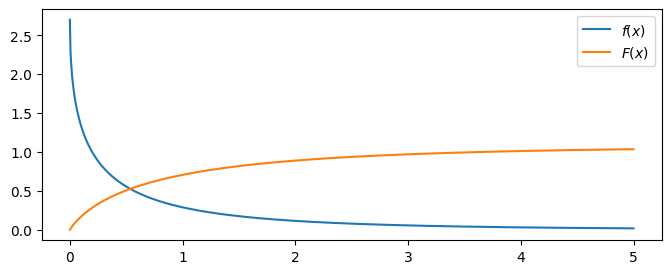

In [10]:
plt.figure(figsize=(8,3))
plt.plot(x, f, label=r'$f(x)$')
plt.plot(x, F, label=r'$F(x)$')
plt.legend()
plt.show()

Clearly F(x) is always increasing but inverting that formula would be a real pain. How can we approximate F'(x) given the information we have?

In [11]:
F_inv_Us = x[np.searchsorted(F[:-1], Us)]

#### Plot

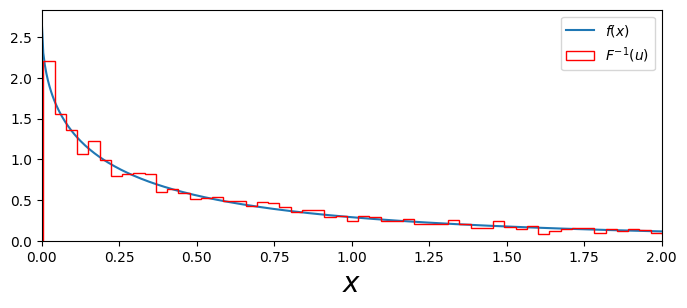

In [12]:
plt.figure(figsize=(8,3))
plt.plot(x, f, label=r'$f(x)$')
plt.hist(F_inv_Us, histtype='step', color='red', density='norm', bins=100, label='$F^{-1}(u)$')
plt.legend()
plt.xlabel('$x$', fontsize=20)
plt.xlim(0,2)
plt.show()

#### 1.3 Built in Random Variables 

In [13]:
r = np.random.rayleigh(size=1000)

#### Plot

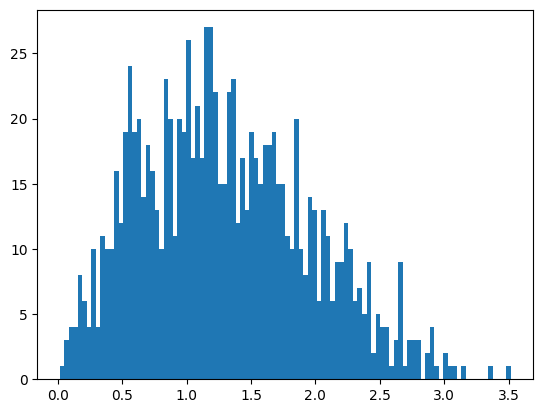

In [14]:
plt.hist(r, bins=100)
plt.show()

Many other functions too:

In [15]:
np.random?

Type:        module
String form: <module 'numpy.random' from '/home/johnadi/Desktop/projects/analytics-projects/env/lib/python3.10/site-packages/numpy/random/__init__.py'>
File:        ~/Desktop/projects/analytics-projects/env/lib/python3.10/site-packages/numpy/random/__init__.py
Docstring:  
Random Number Generation

Use ``default_rng()`` to create a `Generator` and call its methods.

=============== =========================================================
Generator
--------------- ---------------------------------------------------------
Generator       Class implementing all of the random number distributions
default_rng     Default constructor for ``Generator``
=============== =========================================================

============================================= ===
BitGenerator Streams that work with Generator
--------------------------------------------- ---
MT19937
PCG64
PCG64DXSM
Philox
SFC64
============================================= ===

================

### 2. Use these random variables to conduct an experiment

* The amount of particles that enter a detector in 10s is a random variable X with distribution
                                                f(x) = exp(-λ).pow(λ, x) / x!

* The energy deposited by each particle is a random variable E with distribution
                                          g(x) = F1.exp(-sqrt(x/E1)) + F2.exp(-sqrt(x/E2))

The parameters are 

* λ = 4
* F1 = 1.3 GeV^-1
* F2 = 1.4 GeV^-1
* E1 = 0.1 GeV
* E2 = 0.2 GeV

Simulate the energy in the detector over 100000 experiments of 10 seconds each. Plot the distribution

In [18]:
N = 100000

# part 1
X = np.random.poisson(lam=4, size=N)

# Part 2
x = np.linspace(0,5,1000)
F = Fn(x, E1, E2, F1, F2)
Us = np.random.rand(X.sum())
E = x[np.searchsorted(F[:-1], Us)]

Get a net sum of how many particles were detected total after n experiments:

In [19]:
idx = np.insert(X.cumsum(), 0, 0)[:-1]
idx[0:10]

array([ 0,  1,  7, 10, 15, 18, 22, 24, 30, 33])

Use these values to sum energies for each experiment

In [20]:
E[0:10]

array([3.45845846, 0.40540541, 0.9009009 , 0.51051051, 0.22522523,
       0.30530531, 0.03003003, 0.50550551, 0.98598599, 0.7957958 ])

In [21]:
E_10s = np.add.reduceat(E, idx)

#### Plot

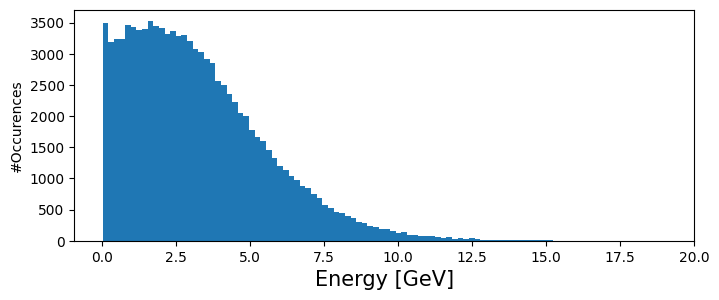

In [23]:
plt.figure(figsize=(8,3))
plt.hist(E_10s, bins=100)
plt.xlabel('Energy [GeV]', fontsize=15)
plt.ylabel('#Occurences')
plt.show()

This distribution is very interesting, and probably doesn't have a name, but it helps us with our experimental planning

In [24]:
np.sum(E_10s>7.5)/len(E_10s)

0.05243

So 5% of the time we expect more than 7.5GeV of energy to be deposited in the detector within 10s. This might be useful when planning for resources.